In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from nilearn import plotting

from src import data,centroids,labels,paths,group_averaging

from netneurotools import metrics
    # https://netneurotools.readthedocs.io/en/latest/, pip install netneurotools does not work for me
    # I downloaded the repository and I am using the local copy

%matplotlib inline

!date -I

2024-05-08


Glasser
simple


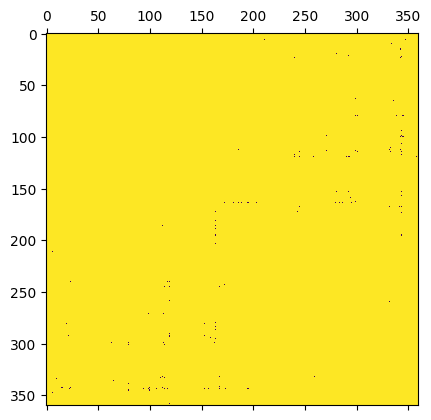

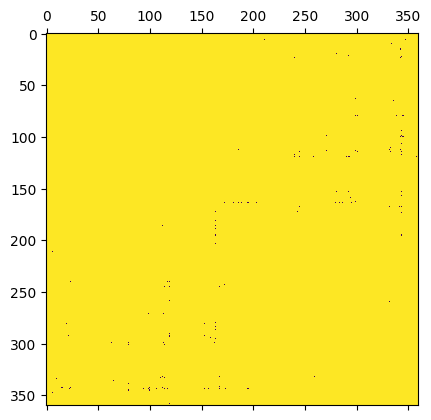

/home/katterrina/fi_muni/0_diplomka/src/data.py:489: RuntimeWarning: Mean of empty slice
  SC_L = np.nanmean(L_nan,axis=0)
/home/katterrina/fi_muni/0_diplomka/src/data.py:54: RuntimeWarning: divide by zero encountered in log
  SC_matrices.append((f"{dataset_name}_{mode}",SC_W, SC_L,np.log(SC_W)))
/home/katterrina/fi_muni/0_diplomka/src/group_averaging.py:75: RuntimeWarning: Mean of empty slice
  SC = np.where(frac > tau,np.nanmean(M,axis=0),np.nan)


cons


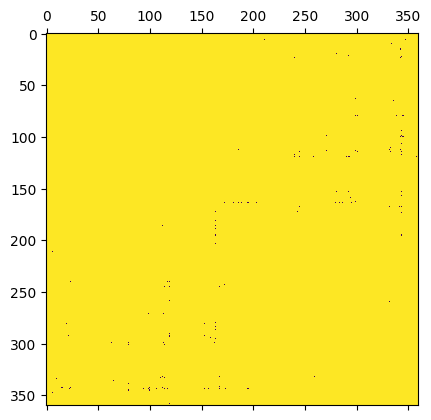

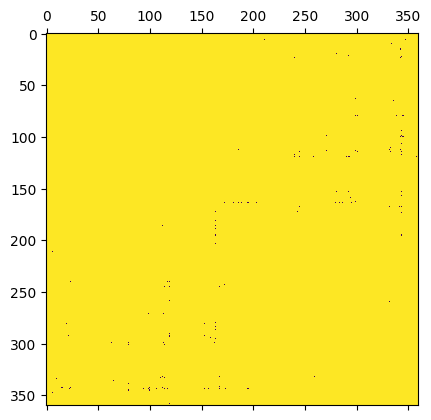

/home/katterrina/fi_muni/0_diplomka/src/data.py:489: RuntimeWarning: Mean of empty slice
  SC_L = np.nanmean(L_nan,axis=0)


In [2]:
print("Glasser")
ED = centroids.glasser_roi_distances()
SC_matrices = data.load_set_of_glasser_matrices_for_ftract(ED=ED)

In [ ]:
for name,_,_,_ in SC_matrices:
    print(name)

Mica-Mics_simple
Mica-Mics_cons
Mica-Mics_dist
Mica-Mics_rh
Enigma_dist
Rosen-Halgren_rh


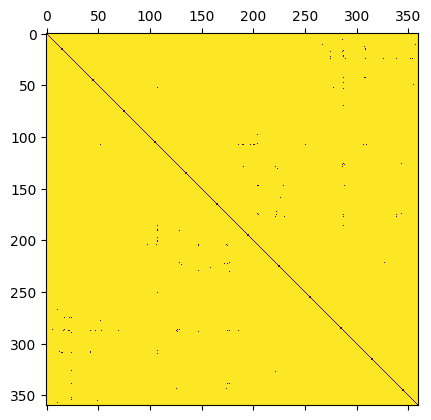

In [ ]:
plt.matshow(SC_matrices[1][1]>0)

In [ ]:
M = data.load_subjects_3Dmatrix_mica(paths.path(f"external/mica-mics/glasser360/"),parcellation="glasser360",n_roi=360,number_of_subjects=50,sc_or_lengths='sc')

In [ ]:
S = group_averaging.create_averaged_matrix_based_on_mode("cons",M)

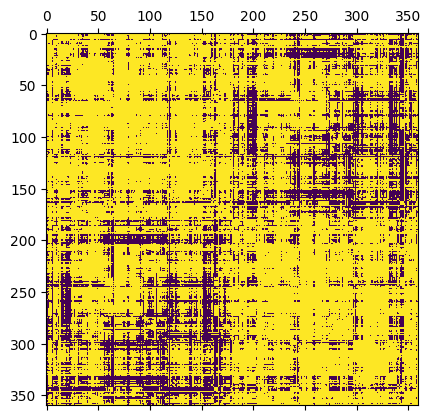

In [ ]:
from src import group_averaging

cons = group_averaging.consensus_thresholding(M)
plt.matshow(cons > 0)

In [3]:
m=M[0,:,:]
print(m)

[[7.4982e+04 2.5412e+01 8.0573e+03 ... 1.4702e+02 3.2367e+00 1.7803e+02]
 [2.5412e+01 4.4614e+02 5.3209e+01 ... 2.5017e-01 2.7730e-01 7.7821e-01]
 [8.0573e+03 5.3209e+01 5.7698e+03 ... 6.6206e+01 0.0000e+00 4.8306e+01]
 ...
 [1.4702e+02 2.5017e-01 6.6206e+01 ... 2.0520e+02 2.2786e+00 3.0115e+01]
 [3.2367e+00 2.7730e-01 0.0000e+00 ... 2.2786e+00 3.2657e+02 3.9200e+02]
 [1.7803e+02 7.7821e-01 4.8306e+01 ... 3.0115e+01 3.9200e+02 7.0353e+02]]


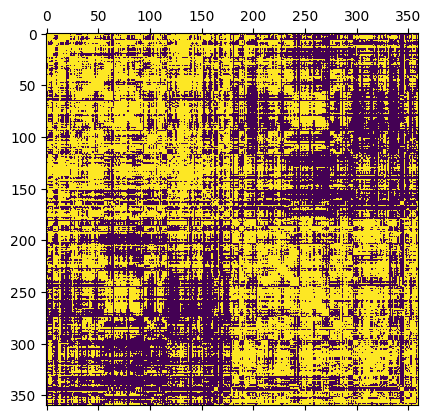

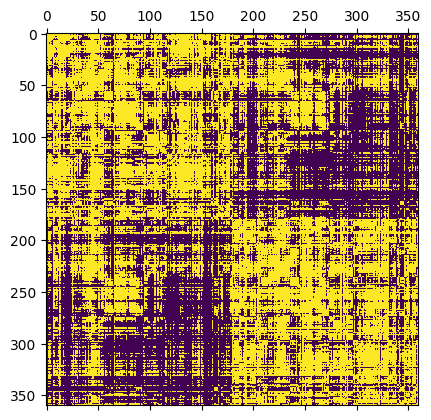

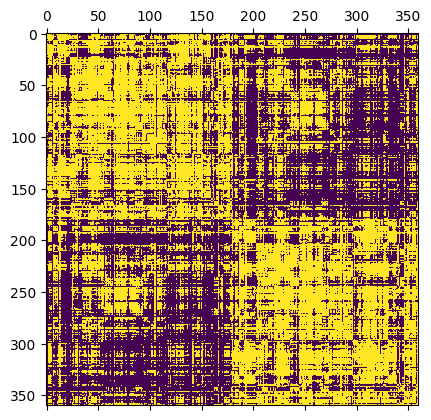

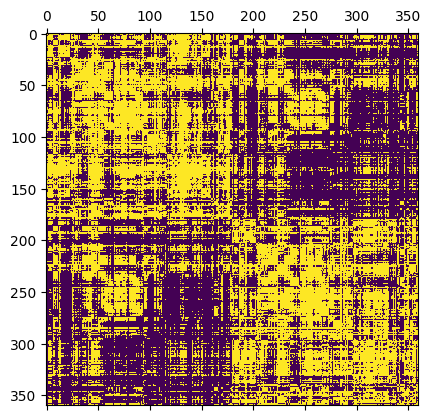

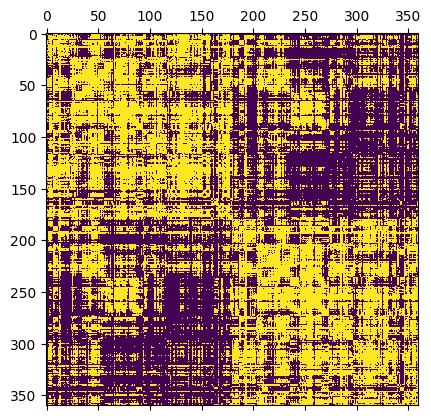

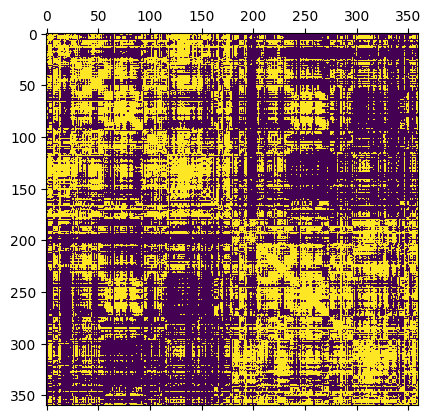

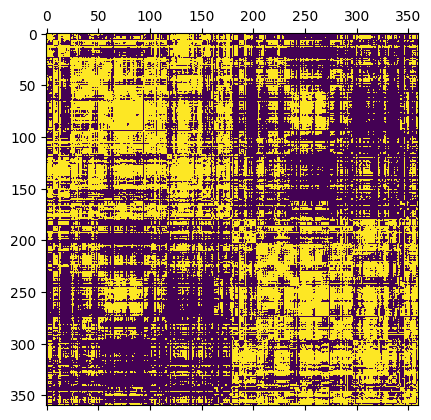

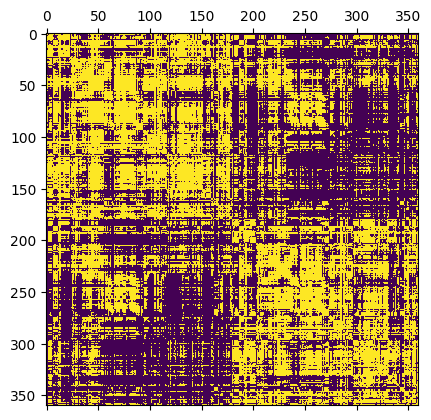

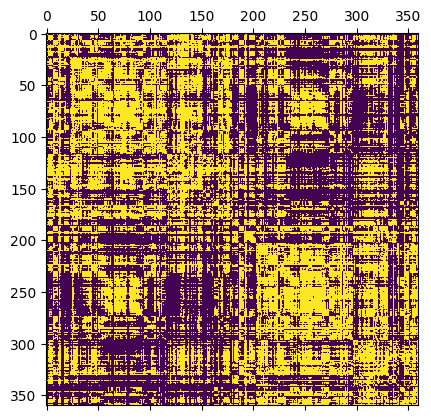

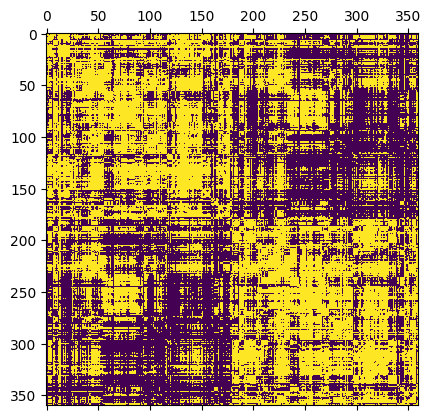

In [4]:
for i in range(10):
    plt.matshow(M[i,:,:]>5)

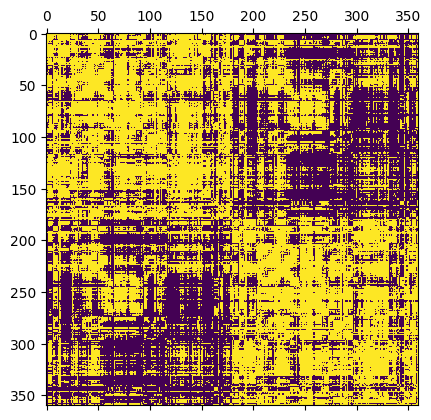

In [5]:
from src import group_averaging

cons = group_averaging.consensus_thresholding(M[:10],tau=0.5)
plt.matshow(cons > 5)

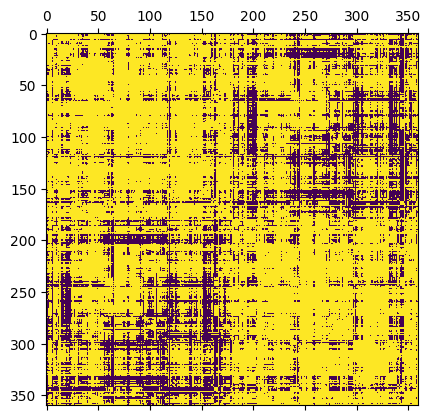

In [6]:
cons = group_averaging.consensus_thresholding(M)
plt.matshow(cons > 0)

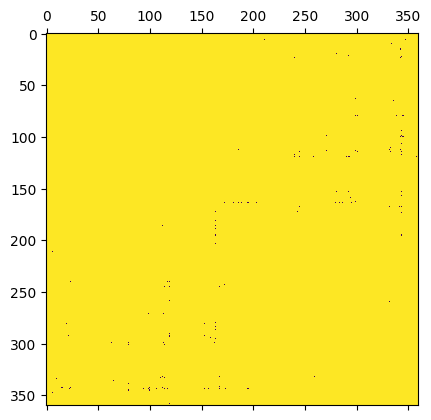

In [7]:
cons = group_averaging.simple_averaging(M)
plt.matshow(cons > 0)

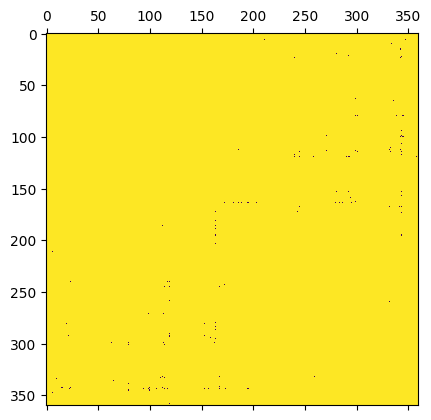

In [8]:
cons = group_averaging.rosenhalgren_sc_averaging(M)
plt.matshow(cons > 0)